In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Dataset

In [131]:
data = pd.read_csv("/content/user1_data.csv",index_col = 0)
data.head(-3)

,pm1,pm2,pm3,am,sm,st,lum
ttime,,,,,,,
2022-07-18 15:42:55,3.63,0.00,0.00,3.2,7813.0,25.65,15001.0
2022-07-18 15:47:55,4.19,0.00,0.00,4.8,7692.0,25.66,13863.0
2022-07-18 15:52:55,4.74,0.00,0.00,4.0,7813.0,25.67,13788.0
2022-07-18 15:57:55,5.30,0.00,0.00,4.8,7813.0,25.68,14383.0
2022-07-18 16:02:55,0.55,5.30,5.30,3.2,7813.0,25.69,14621.0
...,...,...,...,...,...,...,...
2023-03-10 07:24:06,0.55,1.67,28.49,0.0,288.0,29.63,8181.0
2023-03-10 07:51:07,1.11,1.67,28.49,0.0,289.0,29.56,10370.0
2023-03-10 08:18:05,0.55,1.11,28.49,2.4,290.0,29.48,384.0


## **Insights**

In [132]:
data.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,1.610847,2.633942,60.393699,2.015076,4288.940593,26.852714,2714.784292
std,1.058214,1.293359,28.344044,2.280934,2901.962556,1.163759,4231.353590
min,0.550000,0.000000,0.000000,0.000000,286.000000,24.040000,0.000000
25%,0.550000,1.670000,38.550000,0.000000,541.000000,26.110000,1.000000
50%,1.110000,2.230000,51.400000,1.600000,6173.000000,26.700000,6.000000
75%,2.230000,3.350000,77.110000,3.200000,6667.000000,27.390000,4675.000000
max,6.700000,6.700000,153.660000,18.390000,7937.000000,31.170000,19288.000000


### *Data Shape*

In [133]:

data.shape

(19341, 7)

*Just some pandas practice*

In [134]:
temp = list(data.apply(np.mean,axis = 0))
temp2 = list(data.apply(np.median,axis = 0))

mnm = pd.DataFrame([temp,temp2],columns=data.columns,index=["mean","median"])
mnm

,pm1,pm2,pm3,am,sm,st,lum
mean,1.610847,2.633942,60.393699,2.015076,4288.940593,26.852714,2714.784292
median,1.110000,2.230000,51.400000,1.600000,6173.000000,26.700000,6.000000


>## Plotting Practice

In [135]:
import matplotlib.pyplot as plt

In [136]:
data.columns

Index(['pm1', 'pm2', 'pm3', 'am', 'sm', 'st', 'lum'], dtype='object')

In [137]:
# plt.bar(data["am"],data["sm"])
# plt.xlabel("am")
# plt.ylabel("pred..")
# plt.title("am comp")
# plt.show()

In [138]:
# plt.scatter(data["lum"],data["sm"])
# plt.show()

In [139]:
# plt.hist(data["sm"],bins = 5,color = "red",orientation = "horizontal",cumulative =1)
# plt.ylabel("sm")
# plt.xlabel("Applications")
# plt.show()

In [140]:
# gr = data.groupby("st")["sm"].mean()
# list(gr)

In [141]:
# plt.bar(gr.index,list(gr))
# plt.xlabel("st")
# plt.xticks([0,1])
# plt.ylabel("sm")
# plt.title("Do research matter?")
# plt.show()

# Preparing data for training

In [142]:
X = data.iloc[:,:-1]
y = data[["sm"]]
y

,sm
ttime,
2022-07-18 15:42:55,7813.0
2022-07-18 15:47:55,7692.0
2022-07-18 15:52:55,7813.0
2022-07-18 15:57:55,7813.0
2022-07-18 16:02:55,7813.0
...,...
2023-03-10 08:45:06,291.0
2023-03-10 09:12:06,292.0
2023-03-10 09:39:09,291.0


## Standardize the data

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(19341, 6)

### Cost Function

In [144]:
def cost_function(X,y,B):
    m = X.shape[0]
    J = np.sum((np.dot(X,B)-y)**2)/(2*m)
    return J

## Gradient Descent

In [145]:
def gradient_decent(X,y,B,iterations,alpha=0.001):
    history = [0]*iterations
    m = X.shape[0]
    for iteration in range(iterations):
        h = np.dot(X,B)
        loss = h - y
        der = np.dot(loss,X)/m
        B = B - alpha*der
        cost = cost_function(X,y,B)
        print(f"Iteration : {iteration}; Cost : {cost}")
        history[iteration] = cost
    return B,history
        

### Adding Intercept

In [146]:
X = np.c_[np.ones(len(X),dtype='int64'),X] 


# Train-Test Split

In [147]:
m = int(X.shape[0]-(X.shape[0]*0.023))
X_train = X[:m,:]

y_train = y.iloc[:m,:].to_numpy()
y_train= y_train.flatten()

print(X_train)
print(y_train)

X_test = X[m:,:]
y_test = y[m:]

[[ 1.          1.9081253  -2.03656531 ...  0.51950403  1.21440248
  -1.0335    ]
 [ 1.          2.43733241 -2.03656531 ...  1.22098922  1.17270548
  -1.02490693]
 [ 1.          2.95708939 -2.03656531 ...  0.87024663  1.21440248
  -1.01631387]
 ...
 [ 1.         -0.47330668 -1.17831287 ... -0.53272375 -1.37598048
   3.06539243]
 [ 1.          0.05590043 -1.17831287 ...  0.16876144 -1.37598048
   2.99664791]
 [ 1.         -1.00251379 -0.74532065 ... -0.18198116 -1.37598048
   2.92790338]]
[7813. 7692. 7813. ...  296.  296.  296.]


In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(18896, 7)
(18896,)
(445, 7)
(445, 1)


# Model Training

In [149]:
B = np.zeros(X_train.shape[1])
alpha = 0.005
iteratn = 5000
updatedB,hist = gradient_decent(X_train,y_train,B,iteratn,alpha)

Iteration : 0; Cost : 13525003.621332893
Iteration : 1; Cost : 13331258.215132998
Iteration : 2; Cost : 13141396.491192706
Iteration : 3; Cost : 12955320.447041225
Iteration : 4; Cost : 12772934.83918144
Iteration : 5; Cost : 12594147.102093609
Iteration : 6; Cost : 12418867.269652037
Iteration : 7; Cost : 12247007.898882443
Iteration : 8; Cost : 12078483.995989984
Iteration : 9; Cost : 11913212.944589933
Iteration : 10; Cost : 11751114.436075095
Iteration : 11; Cost : 11592110.402055977
Iteration : 12; Cost : 11436124.948811714
Iteration : 13; Cost : 11283084.293691518
Iteration : 14; Cost : 11132916.70340832
Iteration : 15; Cost : 10985552.43416795
Iteration : 16; Cost : 10840923.673578948
Iteration : 17; Cost : 10698964.484289702
Iteration : 18; Cost : 10559610.749301273
Iteration : 19; Cost : 10422800.118905704
Iteration : 20; Cost : 10288471.959201256
Iteration : 21; Cost : 10156567.302137356
Iteration : 22; Cost : 10027028.797043517
Iteration : 23; Cost : 9899800.663597824
Iterat

## Visualizing the loss over iterations

<function matplotlib.pyplot.show(close=None, block=None)>

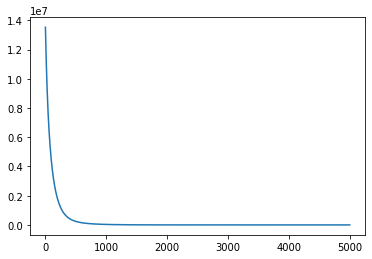

In [150]:
epochs = [x for x in range(1,5001)]
plt.plot(epochs,hist)
plt.show

# Predictions

In [151]:
def pred(x_test, newB):
    return x_test.dot(newB)

In [152]:
y_pred = pred(X_test,updatedB)


In [153]:
y_pred

array([296.04556728, 296.31467258, 296.27452651, 296.3100683 ,
       296.25587747, 296.30546402, 297.26486888, 296.19733816,
       296.06473831, 296.01054748, 297.29324846, 298.23963174,
       300.24894147, 300.27217091, 300.33554642, 300.24351167,
       300.99624298, 301.31849466, 301.33509736, 301.34092246,
       300.32661753, 299.1458691 , 298.11256693, 297.34714923,
       297.3414875 , 296.39766216, 295.33652626, 295.35062916,
       294.38550444, 294.41237313, 294.29435334, 294.23097783,
       293.07914182, 293.0285321 , 294.35033472, 294.35411348,
       294.33654576, 294.28414548, 294.36233313, 294.28209914,
       294.22893148, 295.09690574, 295.07131601, 295.35472186,
       295.28750944, 295.35088496, 295.28316096, 295.31895854,
       295.26502351, 295.31461006, 295.26067502, 295.2064842 ,
       295.05112961, 294.99719457, 296.30265029, 296.24871526,
       296.29804601, 296.2719447 , 298.30761153, 299.29485012,
       299.24117088, 299.39370928, 299.36837535, 300.33

In [154]:
import sklearn.metrics as sm

# Calculating R2 Score

In [155]:
print(sm.r2_score(y_test,y_pred))
print(y_pred.shape,y_test.shape)

y_test

0.992772346384118
(445,) (445, 1)


,sm
ttime,
2023-03-01 02:49:13,296.0
2023-03-01 03:16:15,296.0
2023-03-01 03:43:14,296.0
2023-03-01 04:10:14,296.0
2023-03-01 04:37:16,296.0
...,...
2023-03-10 08:45:06,291.0
2023-03-10 09:12:06,292.0
2023-03-10 09:39:09,291.0


In [156]:
vals = y_test.assign(predictions = y_pred)


In [157]:
vals

,sm,predictions
ttime,,
2023-03-01 02:49:13,296.0,296.045567
2023-03-01 03:16:15,296.0,296.314673
2023-03-01 03:43:14,296.0,296.274527
2023-03-01 04:10:14,296.0,296.310068
2023-03-01 04:37:16,296.0,296.255877
...,...,...
2023-03-10 08:45:06,291.0,291.301768
2023-03-10 09:12:06,292.0,292.351161
2023-03-10 09:39:09,291.0,291.283886


In [158]:
print(y_test.shape)
print(y_pred.shape)
y_test=y_test.to_numpy()
mse=np.square(np.subtract(y_test,y_pred))
print(mse.shape)


(445, 1)
(445,)
(445, 445)


In [159]:
# import matplotlib.pyplot as plt
# x1=list(range(3869))
# y1=list(mse)
# plt.plot(x1[:300],y1[:300])
# plt.show()

In [160]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.2699708872885638
Mean Square Error: 0.08477646242950597
Root Mean Square Error: 0.2911639785919714


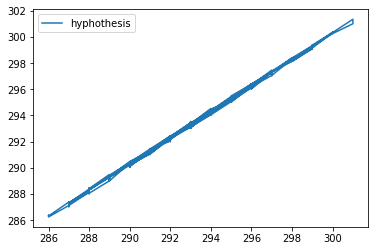

In [161]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,label='hyphothesis')
plt.legend(loc='upper left')